#### Импорт библиотек для анализа данных

In [1]:
import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from apriori_python import apriori as apr 
from efficient_apriori import apriori as eff_apr
from fpgrowth_py import fpgrowth
from PyARMViz import PyARMViz

#### Загрузка данных

Выполнены следующие действия:

* Импорт данных из .csv файла
* Обработка данных, удаление строк и столбцов со значениями **Null**/**None**/**NaN**

In [2]:
dataset = pd.read_csv('BreadBasket_DMS.csv')
dataset

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


In [3]:
transactions = []
temp_row = []
flag = False
n = 1
for i in range(dataset.shape[0]):
    row = dataset.iloc[i].dropna().tolist()
    if row[2] == n and row[3] != 'NONE':
        temp_row.append(row[3])
        flag = True
    elif row[3] != 'NONE':
        transactions.append(temp_row.copy())
        temp_row.clear()
        temp_row.append(row[3])
        flag = False
        n = int(row[2])
    else:
        n = int(row[2])

if flag == False:
    transactions.append(temp_row)

count = 0
for i in transactions:
    count += 1

transactions

[['Bread'],
 ['Scandinavian', 'Scandinavian'],
 ['Hot chocolate', 'Jam', 'Cookies'],
 ['Muffin'],
 ['Coffee', 'Pastry', 'Bread'],
 ['Medialuna', 'Pastry', 'Muffin'],
 ['Medialuna', 'Pastry', 'Coffee', 'Tea'],
 ['Pastry', 'Bread'],
 ['Bread', 'Muffin'],
 ['Scandinavian', 'Medialuna'],
 ['Bread', 'Medialuna', 'Bread'],
 ['Jam', 'Coffee', 'Tartine', 'Pastry', 'Tea'],
 ['Basket', 'Bread', 'Coffee'],
 ['Bread', 'Medialuna', 'Pastry', 'Mineral water', 'Scandinavian'],
 ['Bread', 'Medialuna', 'Coffee'],
 ['Hot chocolate'],
 ['Farm House'],
 ['Farm House', 'Bread'],
 ['Bread', 'Medialuna'],
 ['Coffee', 'Coffee', 'Medialuna', 'Bread'],
 ['Jam'],
 ['Scandinavian', 'Muffin'],
 ['Bread'],
 ['Scandinavian'],
 ['Fudge'],
 ['Scandinavian'],
 ['Coffee', 'Bread'],
 ['Bread', 'Jam'],
 ['Bread'],
 ['Basket'],
 ['Scandinavian', 'Muffin'],
 ['Coffee'],
 ['Coffee', 'Muffin'],
 ['Muffin', 'Scandinavian'],
 ['Tea', 'Bread'],
 ['Coffee', 'Bread'],
 ['Bread', 'Tea'],
 ['Scandinavian'],
 ['Juice', 'Tartine', 'Co

#### Использование **apriori_python** для построения ассоциативных правил

Выполнены следующие действия:

* Пстроение списка ассоциативных правил методом **apriori_python**:
    * **'minSup'** – минимальная поддержка, то есть ```число транзакций, содержащих A и B / общее число транзакций```
    * **'minConf'** – минимальная достоверность, то есть ```число транзакций, содержащих A и B / число транзакций, содержащих только A```
* Оценка времени, потраченного на выполнение метода

In [4]:
t1 = []  # Хранение затраченного времени

start = time.perf_counter()
freqItemSetAp1, rules1 = apr(transactions, minSup=0.01, minConf=0.6)  # Достовренось 60%
t1.append(time.perf_counter()-start)
rules1

[[{'Toast'}, {'Coffee'}, 0.7044025157232704]]

In [5]:
t2 = []  # Хранение затраченного времени

start = time.perf_counter()
freqItemSetAp2, rules2 = apr(transactions, minSup=0.01, minConf=0.7) # Достовренось 80%
t2.append(time.perf_counter()-start)
rules2

[[{'Toast'}, {'Coffee'}, 0.7044025157232704]]

#### Использование **efficient-apriori** для построения ассоциативных правил

Выполнены следующие действия:

* Пстроение списка ассоциативных правил методом **efficient-apriori**
* Оценка времени, потраченного на выполнение метода

In [6]:
start = time.perf_counter()
freqItemSetApEf1, rules_ap_ef1 = eff_apr(transactions, min_support=0.01, min_confidence=0.6)  # Достоверность 60%
t1.append(time.perf_counter()-start)
for i in rules_ap_ef1:
    print(i)

{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.452, conv: 1.742)


In [7]:
start = time.perf_counter()
freqItemSetApEf2, rules_ap_ef2 = eff_apr(transactions, min_support=0.01, min_confidence=0.7)  # Достоверность 80%
t2.append(time.perf_counter()-start)
for i in rules_ap_ef2:
    print(i)

{Toast} -> {Coffee} (conf: 0.704, supp: 0.024, lift: 1.452, conv: 1.742)


#### Использование **FPGrowth** для построения ассоциативных правил

Выполнены следующие действия:

* Пстроение списка ассоциативных правил методом **FPGrowth**
* Оценка времени, потраченного на выполнение метода

In [8]:
start = time.perf_counter()
freqItemSetFP1, rules_fp1 = fpgrowth(transactions, minSupRatio=0.01, minConf=0.6)  # Достоверность 60% 
t1.append(time.perf_counter()-start)
for i in rules_fp1:
    print(i)

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]


In [9]:
start = time.perf_counter()
freqItemSetFP2, rules_fp2 = fpgrowth(transactions, minSupRatio=0.01, minConf=0.7)  # Достоверность 80%
t2.append(time.perf_counter()-start)
for i in rules_fp2:
    print(i)

[{'Toast'}, {'Coffee'}, 0.7044025157232704]
[{'Toast'}, {'Coffee'}, 0.7044025157232704]


#### Визуализация полученных данных

Выполнены следующие действия:

* Сравнение времени выполнения всех алгоритмов и построение гистограммы
* Построение диаграмм ассоциативных правил:
    * Для метода **efficient_apriori**
    * Для метода **fpgrowth**

Время выполнения apriori:  1.161149900000055 

Время выполнения efficient_apriori:  0.015361199999915698 

Время выполнения fpgrowth:  1.1607623999999532 



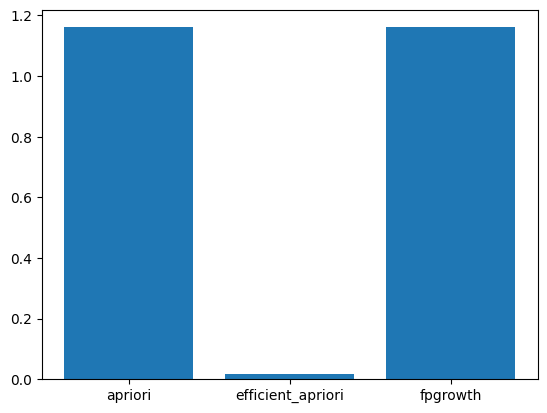

In [10]:
print('Время выполнения apriori: ', t1[0], '\n')
print('Время выполнения efficient_apriori: ', t1[1], '\n')
print('Время выполнения fpgrowth: ', t1[2], '\n')
plt.bar(['apriori', 'efficient_apriori', 'fpgrowth'], t1)
plt.show()

Время выполнения apriori:  1.3006927000000132 

Время выполнения efficient_apriori:  0.01377629999990404 

Время выполнения fpgrowth:  0.7855569000000742 



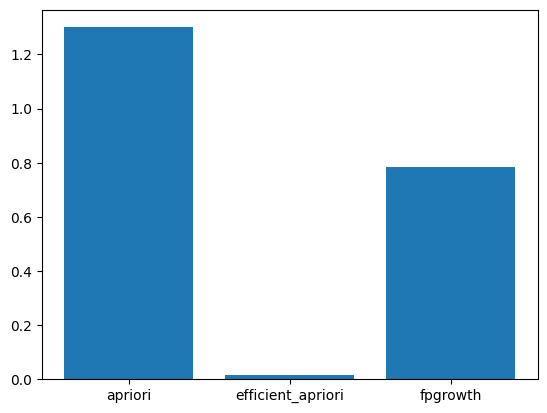

In [11]:
print('Время выполнения apriori: ', t2[0], '\n')
print('Время выполнения efficient_apriori: ', t2[1], '\n')
print('Время выполнения fpgrowth: ', t2[2], '\n')
plt.bar(['apriori', 'efficient_apriori', 'fpgrowth'], t2)
plt.show()

In [12]:
# Efficient apriori rules visualization

PyARMViz.adjacency_parallel_coordinate_plot(rules_ap_ef1)
PyARMViz.metadata_scatter_plot(rules_ap_ef1)

In [13]:
# Efficient apriori rules visualization

PyARMViz.adjacency_parallel_coordinate_plot(rules_ap_ef2)
PyARMViz.metadata_scatter_plot(rules_ap_ef2)

# Выводы по проделанной работе:

* Получены базовые знания в области анализа транзакий на основе ассоциативных правил
* Рассмотрены разные алгоритмы постройки ассоциативных правил
    * Самым эффективным по обработке данных стал метод **efficient_apriori**, *t = 0,13 сек.*
* Полученные данные позволяют сделать выводы по предпочтениям покупателей при выборе товаров и зависимости принятия решений  